In [1]:
import sys
sys.path.append("../")
from initial_dataSet import DataSet
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import torch

%matplotlib inline

In [2]:
read_dir='E:/文档/知识点交互认知诊断/实验结果/'

data=pd.read_csv(read_dir+'敏感度实验.csv',index_col=0)
dataSet_list = ('ASSIST_0910', 'ASSIST_2017', 'JUNYI', 'MathEC')
index_list=['dataSet','n_splits','potential_num','batch_size','test_ratio']
value_list=['acc', 'auc', 'rmse', 'mae']

In [3]:
mean_data=pd.DataFrame(columns=index_list+value_list)
counter=0
for idx in range(0,len(data),5):
    data_i=data.iloc[idx:idx+5,:]
    assert len(data_i)==5
    mean_data.loc[counter,index_list]=data_i.loc[idx,index_list]
    mean_data.loc[counter,value_list]=data_i.loc[:,value_list].mean()
    counter+=1

In [4]:
# mean_data.to_csv(read_dir+'敏感度均值.csv')

In [5]:
split_list=np.unique(mean_data['n_splits']).astype('int').tolist()
poten_list=np.unique(mean_data['potential_num']).astype('int').tolist()
batch_list=np.unique(mean_data['batch_size']).astype('int').tolist()
ratio_list=(1-np.unique(mean_data['test_ratio']).astype('float')).tolist()
unique_list=[split_list,poten_list,batch_list,ratio_list]

In [6]:
stand_split=2
stand_poten=32
stand_batch=64
stand_ratio=0.8
stand_list=[stand_split,stand_poten,stand_batch,stand_ratio]

In [7]:
new_index_list=['dataSet','n_splits','potential_num','batch_size','train_ratio']
mean_data['train_ratio']=1-mean_data['test_ratio']

mean_data=mean_data.drop(['test_ratio'],axis=1).set_index(new_index_list).sort_index()

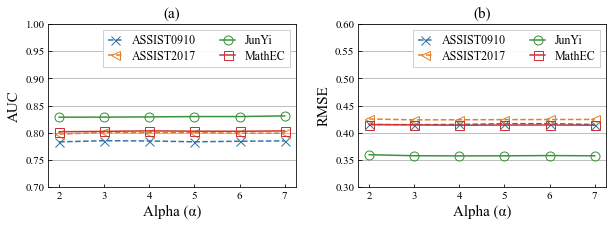

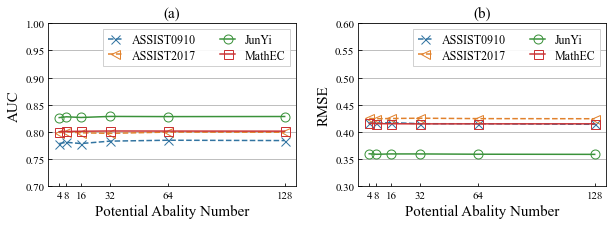

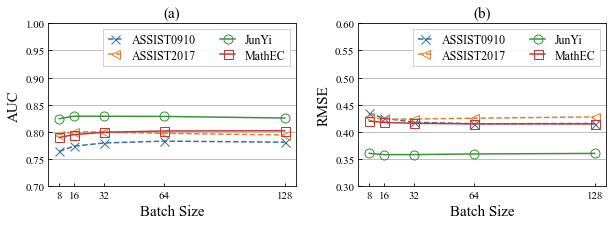

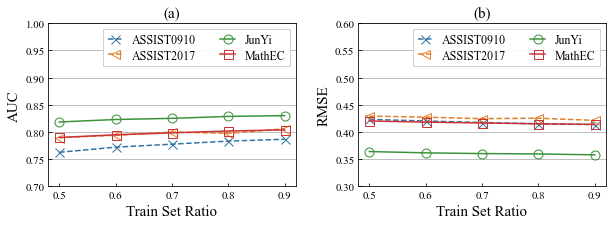

In [10]:
x_list=['n_splits','potential_num','batch_size','train_ratio']
y_label=['AUC','RMSE']
title=['(a)','(b)']
x_label=['Alpha (α)','Potential Abality Number','Batch Size','Train Set Ratio']
legend=['ASSIST0910','ASSIST2017','JunYi', 'MathEC', 'KddCup']
ylim=[(0.7,1.0),(0.3,0.6)]

line_style=['--x','--<','-o','-s','-^']
color_list=['#3274a1','#e1812c','#3a923a','#cb3335','#d8b445']
markersize=9

# 坐标轴的刻度设置向内(in)或向外(out)
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

for i,x_name in enumerate(x_list):
    idx=stand_list.copy()
    idx[i]=unique_list[i]
    plt.subplots(figsize=(10,3))
    plt.subplots_adjust(wspace=0.25,hspace=0.25)
    for k,dataSet in enumerate(dataSet_list):
        now_idx=[dataSet]+idx
        now_data=mean_data.loc[tuple(now_idx),:].reset_index().sort_values(by=x_name)

        for j,y_name in enumerate(['auc','rmse']):
            plt.subplot(1,2,j+1)
            plt.plot(now_data[x_name],now_data[y_name],line_style[k],color=color_list[k],
                     markerfacecolor='none',markersize=markersize)
            plt.title(title[j],fontdict={'family':'Times New Roman', 'size': 15})
            plt.ylabel(y_label[j],fontdict={'family':'Times New Roman', 'size': 15})
            plt.yticks(fontproperties = 'Times New Roman', size = 11)
            plt.xlabel(x_label[i],fontdict={'family':'Times New Roman', 'size': 15})
            plt.xticks(unique_list[i],fontproperties = 'Times New Roman', size = 11)
            plt.legend(legend,framealpha=0.9,ncol=2,labelspacing=0.3,
                       handlelength=1.2,fancybox=False,
                       prop={'family':'Times New Roman', 'size': 12})
            plt.grid(axis='y',linestyle = '-',zorder=0)
            plt.ylim(ylim[j])
    plt.savefig('./output/'+x_name+'-sensitivity.jpg',dpi=1200,bbox_inches='tight')
    plt.show()

# plt.savefig('./output/sensitivity.jpg',dpi=800,bbox_inches='tight')
# plt.show()